# github.com/mrdbourke

In [1]:
!nvidia-smi

Wed Jul 10 21:29:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.154.05             Driver Version: 535.154.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-PCIE-40GB          Off | 00000000:1A:00.0 Off |                    0 |
| N/A   68C    P0             259W / 250W |  30415MiB / 40960MiB |     90%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

## 00. Pytorch Fundamentals
Resource notebook https://www.learnpytorch.io/00_pytorch_fundamentals/


In [1]:
import torch
print(torch.__version__)

2.3.1


# Introduction to Tensors
## Creating Tensors
Pytorch tensors are created using torch.tensor() = https://pytorch.org/docs/stable/tensors.html



In [3]:
# scalar
scalar = torch.tensor(7)
print(scalar)

tensor(7)


In [4]:
scalar.ndim

0

In [7]:
# Get tensor back as Python int
scalar.item()

7

In [10]:
# Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [11]:
vector.ndim

1

In [13]:
vector.shape

torch.Size([2])

In [15]:
# MATRIX
MATRIX = torch.tensor([[7,8],
                      [9,10]])
MATRIX


tensor([[ 7,  8],
        [ 9, 10]])

In [16]:
MATRIX.ndim

2

In [17]:
MATRIX.shape

torch.Size([2, 2])

In [19]:
MATRIX[0]

tensor(8)

In [20]:
MATRIX[0][0]

tensor(7)

In [29]:
# TENSOR
TENSOR = torch.tensor([[[1, 2, 3],
                       [3, 4, 5],
                       [6, 7, 8]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 4, 5],
         [6, 7, 8]]])

In [30]:
TENSOR.ndim

3

In [31]:
TENSOR.shape

torch.Size([1, 3, 3])

In [32]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 4, 5],
        [6, 7, 8]])

In [33]:
# TENSOR
TENSORS = torch.tensor([[[1, 2, 3],
                       [3, 4, 5],
                       [6, 7, 8]],
                      [[1, 2, 3],
                       [3, 4, 5],
                       [6, 7, 8]]])
TENSORS

tensor([[[1, 2, 3],
         [3, 4, 5],
         [6, 7, 8]],

        [[1, 2, 3],
         [3, 4, 5],
         [6, 7, 8]]])

In [34]:
TENSORS.ndim

3

In [35]:
TENSORS.shape

torch.Size([2, 3, 3])

In [36]:
TENSORS[0]

tensor([[1, 2, 3],
        [3, 4, 5],
        [6, 7, 8]])

In [37]:
TENSORS[1]

tensor([[1, 2, 3],
        [3, 4, 5],
        [6, 7, 8]])

In [38]:
TENSORS[0][0]

tensor([1, 2, 3])

In [41]:
TENSORS[0][1][0]

tensor(3)

### Random Tensors

We've established tensors represent some form of data.

And machine learning models such as neural networks manipulate and seek patterns within tensors.

But when building machine learning models with PyTorch, it's rare you'll create tensors by hand (like what we've being doing).

Instead, a machine learning model often starts out with large random tensors of numbers and adjusts these random numbers as it works through data to better represent it.

In essence:

Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers...

As a data scientist, you can define how the machine learning model starts (initialization), looks at data (representation) and updates (optimization) its random numbers.

We'll get hands on with these steps later on.

For now, let's see how to create a tensor of random numbers.

We can do so using torch.rand() and passing in the size parameter.


torch.rand(*size, *, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False) → Tensor

In [42]:
# Random Tensor
random = torch.rand(4)
random

tensor([0.4852, 0.8289, 0.6631, 0.2450])

In [12]:
random1 = torch.rand(3,4)
random1

tensor([[0.8396, 0.3016, 0.7014, 0.2116],
        [0.0648, 0.4666, 0.4193, 0.3756],
        [0.1181, 0.2966, 0.3148, 0.7013]])

In [46]:
random2 = torch.rand(2,4,3)
random2

tensor([[[0.5986, 0.8329, 0.5684],
         [0.9794, 0.2915, 0.3323],
         [0.5719, 0.4260, 0.3523],
         [0.9292, 0.0570, 0.5567]],

        [[0.7852, 0.1748, 0.7175],
         [0.3223, 0.6544, 0.7489],
         [0.1924, 0.4279, 0.1016],
         [0.0199, 0.9231, 0.9558]]])

In [48]:
# Random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size= (3,224,224)) # colour-channels, height, width
random_image_size_tensor

tensor([[[0.5280, 0.8307, 0.1995,  ..., 0.7770, 0.4081, 0.4010],
         [0.6533, 0.1961, 0.7765,  ..., 0.7350, 0.7935, 0.4151],
         [0.0466, 0.8840, 0.0198,  ..., 0.1449, 0.4934, 0.8784],
         ...,
         [0.2521, 0.0741, 0.2642,  ..., 0.0635, 0.7743, 0.3094],
         [0.1585, 0.5399, 0.1326,  ..., 0.4427, 0.5195, 0.7425],
         [0.6970, 0.0948, 0.2198,  ..., 0.9080, 0.5822, 0.4513]],

        [[0.4323, 0.3735, 0.0963,  ..., 0.0332, 0.2166, 0.1928],
         [0.2459, 0.7744, 0.3430,  ..., 0.1809, 0.6329, 0.1383],
         [0.6979, 0.7400, 0.4435,  ..., 0.1539, 0.4531, 0.5434],
         ...,
         [0.0216, 0.7777, 0.9398,  ..., 0.3635, 0.4733, 0.7808],
         [0.1185, 0.7603, 0.9294,  ..., 0.6186, 0.7668, 0.9043],
         [0.6811, 0.9530, 0.8071,  ..., 0.0199, 0.4287, 0.6516]],

        [[0.4783, 0.9910, 0.2803,  ..., 0.5823, 0.1972, 0.8282],
         [0.5691, 0.3741, 0.5429,  ..., 0.5220, 0.2556, 0.8807],
         [0.4236, 0.8048, 0.8833,  ..., 0.8467, 0.2597, 0.

In [49]:
random_image_size_tensor.shape

torch.Size([3, 224, 224])

In [50]:
random_image_size_tensor.ndim

3

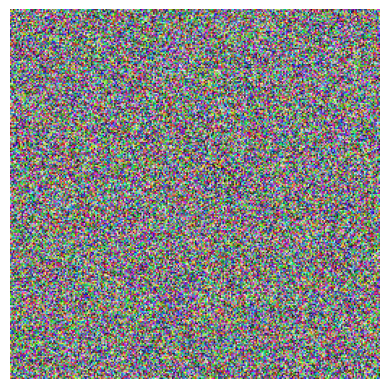

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Generate a random tensor
tensor = torch.rand(3, 256, 256)  # A random tensor with shape (3, 256, 256)

# Convert the tensor to a NumPy array
np_array = tensor.numpy()

# Transpose the array to (256, 256, 3) for displaying as an image
np_array = np.transpose(np_array, (1, 2, 0))

# Display the image
plt.imshow(np_array)
plt.axis('off')  # Turn off axis
plt.show()


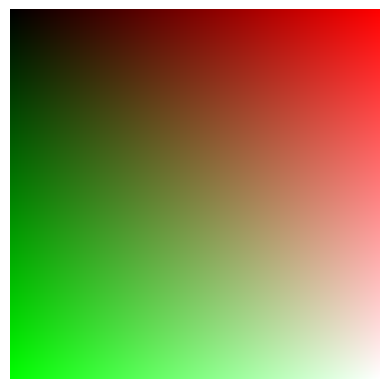

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Generate a gradient tensor
x = np.linspace(0, 1, 256)
y = np.linspace(0, 1, 256)
x_grid, y_grid = np.meshgrid(x, y)

# Create a 3-channel image with gradient patterns
tensor = torch.tensor(np.stack([x_grid, y_grid, x_grid * y_grid], axis=0), dtype=torch.float32)

# Convert the tensor to a NumPy array
np_array = tensor.numpy()

# Transpose the array to (256, 256, 3) for displaying as an image
np_array = np.transpose(np_array, (1, 2, 0))

# Display the image
plt.imshow(np_array)
plt.axis('off')  # Turn off axis
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Generate a random tensor
tensor = torch.rand(3, 256, 256)  # A random tensor with shape (3, 256, 256)

# Apply a transformation (e.g., raise to a power)
tensor = torch.pow(tensor, 0.5)  # Brighten the image

# Convert the tensor to a NumPy array
np_array = tensor.numpy()

# Transpose the array to (256, 256, 3) for displaying as an image
np_array = np.transpose(np_array, (1, 2, 0))

# Display the image
plt.imshow(np_array)
plt.axis('off')  # Turn off axis
plt.show()


# Zeros and Ones

In [11]:
# Create a tensor of all zeros
zeros = torch.zeros(3,4)
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [27]:
zeros*random1

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [28]:
# Create a tensor of all ones
ones = torch.ones(3,4)
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [29]:
ones.dtype

torch.float32

# Creating range of tensors and tensors-like

In [35]:
# Use torch.range()
range_of_tensors = torch.arange(1,11)
print(range_of_tensors)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])


In [34]:
range_of_tensors1 = torch.arange(0,51,2)
print(range_of_tensors1)

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48, 50])


In [36]:
# Creating tensor like (used to create a same shape as other tensor)
zeroes_like_tensor = torch.zeros_like(input = range_of_tensors1)
zeroes_like_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

# Dealing with Tensor datatypes


In [4]:
# float 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0], dtype = None)
float_32_tensor

tensor([3., 6., 9.])

In [5]:
float_32_tensor.dtype

torch.float32

In [6]:
# float 16 tensor
float_16_tensor = torch.tensor([3.0, 6.0, 9.0], dtype = torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

**Note:** Tensor datatypes is one of the 3 big errors you'll run into with PyTorch & deep learning:
1. Tensors not righ datatype
2. Tesnors not right shape
3. Tensors not on right device

In [7]:
# float 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0], 
                               dtype = None, # what datatype is the tensor (e.g. float32 or float16)
                               device = None, # what device is your tensor on CPU or GPU (cuda)
                               requires_grad = False) # wheter or not track gradients with this tensors operations
float_32_tensor

tensor([3., 6., 9.])

In [9]:
# converting from one dtype tensor to another dtype tensor
float_16_tensor = float_32_tensor.type(torch.float16) 
#float_16_tensor = float_32_tensor.type(half)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [10]:
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [13]:
int_32_tensor = torch.tensor([2, 4, 6], dtype = torch.int32)
int_32_tensor

tensor([2, 4, 6], dtype=torch.int32)

In [14]:
int_32_tensor * float_32_tensor

tensor([ 6., 24., 54.])

In [15]:
int_32_tensor * float_16_tensor

tensor([ 6., 24., 54.], dtype=torch.float16)

# Getting information from tensors
1. Tensors not righ datatype   (to get datatype from tensors use tensor.dtype)
2. Tesnors not right shape     (to get a shape from tensor, can use 'tensor.shape')
3. Tensors not on right device ( to get device from tensor, can use 'tensor.device')

In [16]:
# Create a tensor 
some_tensor = torch.rand(size = (3, 4), dtype = torch.float16,
                                        device = None)
some_tensor

tensor([[0.2998, 0.1436, 0.5029, 0.4917],
        [0.5317, 0.7642, 0.6260, 0.5981],
        [0.7563, 0.6074, 0.8418, 0.2017]], dtype=torch.float16)

In [17]:
some_tensor.dtype

torch.float16

In [18]:
some_tensor.shape

torch.Size([3, 4])

In [19]:
some_tensor.device

device(type='cpu')

# Manipilating Tensors (Tensor Operations)
It includes:
* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix Multiplication

In [21]:
# Create a tensor and add 10 to it
tensor1 = torch.tensor([1, 2, 3])
tensor1 + 10

tensor([11, 12, 13])

In [23]:
# Multiply a tensor by 10
tensor1 * 10

tensor([10, 20, 30])

In [24]:
# Subtract a tensor by 10
tensor1 - 10

tensor([-9, -8, -7])

In [25]:
# try out pytorch inbuilt functions
torch.mul(tensor1, 10)

tensor([10, 20, 30])

In [27]:
torch.add(tensor1, 10)

tensor([11, 12, 13])

In [28]:
torch.subtract(tensor1, 10)

tensor([-9, -8, -7])

In [29]:
torch.divide(tensor1, 2)

tensor([0.5000, 1.0000, 1.5000])

# Matrix Multiplication in tensors (dot product)

In [31]:
# Element wise multiplication
print(tensor1, "*", tensor1)
print(f"Equals to {tensor1 * tensor1}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals to tensor([1, 4, 9])


In [33]:
# Matrix multiplication
torch.matmul(tensor1, tensor1)

tensor(14)

In [2]:
tensor1 = torch.randint(low = 0, high = 100, size = (3, 4) , dtype = torch.int32)
tensor2 = torch.randint(low = 0, high = 100, size = (4, 3) , dtype = torch.int32)
tensor1

tensor([[57, 61, 25, 14],
        [35, 45, 70, 57],
        [67, 82, 27, 94]], dtype=torch.int32)

In [12]:
%%time
torch.matmul(tensor1,tensor2)

CPU times: user 498 μs, sys: 0 ns, total: 498 μs
Wall time: 232 μs


tensor([[ 6653,  3989,  8022],
        [11259, 13016, 11130],
        [12456, 11398, 13433]], dtype=torch.int32)

### One of the most common errors in deep learning: shape errors

In [3]:
tensor_A = torch.tensor([[1, 2],
                        [3, 4],
                        [5, 6]])

tensor_B = torch.tensor([[7, 10],
                        [8, 11],
                        [9, 12]])
tensor_A.shape

torch.Size([3, 2])

To fix our tensor shape issue, we can manipulate the shape of one of our tensor using a **transpose**.

A **transpose** switches the axis or dimensions of a tensor

In [4]:
tensor_B.T

tensor([[ 7,  8,  9],
        [10, 11, 12]])

In [5]:
tensor_B

tensor([[ 7, 10],
        [ 8, 11],
        [ 9, 12]])